# MLP for image classification

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test,y_test) = load_data()

In [2]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

# Normalize data

$$ X' = \frac{X - X_{min}}{X_{max} - X_{min}} $$

In [3]:
print(f"min :{X_train.min()} - max :{X_train.max()}")

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

print(f"min :{X_test.min()} - max :{X_test.max()}")

min :0 - max :255
min :0.0 - max :1.0


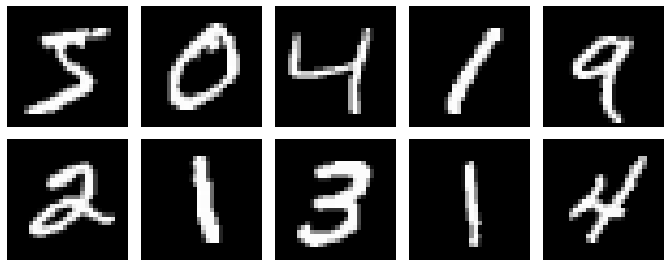

In [4]:
def display_images(data, nrows=2, ncols=5, figsize=(12, 4)):

    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i, :, :], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(X_train)

# MLP model

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def MLP_model(nodes = None, names = None, activations = []):
    model = Sequential(name = "MLP_model")
    model.add(Flatten(input_shape = (28,28), name = "input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))
    
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    return model

model_1 = MLP_model(nodes = [10], names = ["Output_layer"], activations=["softmax"])
model_1.summary()
# 28x28 -> 784 -> 784 weights & 1 bias -> 785 * 10 (output nodes) -> 7850  

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


2022-04-25 12:56:33.545367: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model_1.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=0)

In [7]:
metrics = pd.DataFrame(model_1.history.history)
metrics.index = range(len(metrics))
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.503491,0.86908,0.306484,0.9172
1,0.316139,0.91238,0.280217,0.9220
2,0.292517,0.91876,0.268361,0.9265
3,0.280965,0.92054,0.263562,0.9263
4,0.273579,0.92332,0.263212,0.9279


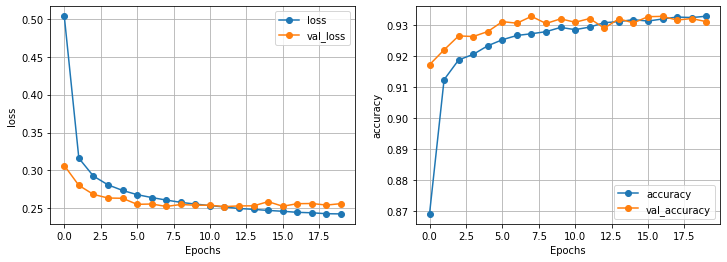

In [8]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, col in zip(axes, columns):
        df_history.plot(y=col, xlabel="Epochs",
                        ylabel=col[0], ax=ax, style=style)
        ax.grid()

plot_metrics(metrics)

# Hidden layers

In [9]:
model_2 = MLP_model(nodes=[128, 128, 10], activations=[
                    "relu", "relu", "softmax"], names=["Hidden1", "Hidden2", "Output"])
model_2.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden1 (Dense)             (None, 128)               100480    
                                                                 
 Hidden2 (Dense)             (None, 128)               16512     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_2.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2493 - accuracy: 0.9250 - val_loss: 0.1171 - val_accuracy: 0.9665
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1045 - accuracy: 0.9678 - val_loss: 0.1010 - val_accuracy: 0.9683
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0715 - accuracy: 0.9780 - val_loss: 0.0800 - val_accuracy: 0.9755
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0557 - accuracy: 0.9825 - val_loss: 0.0902 - val_accuracy: 0.9734
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0415 - accuracy: 0.9860 - val_loss: 0.0976 - val_accuracy: 0.9726
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0350 - accuracy: 0.9882 - val_loss: 0.0892 - val_accuracy: 0.9746
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0304 - accuracy: 0.9898 - val_loss: 0.0909 - val_accuracy:

In [11]:
metrics = pd.DataFrame(model_2.history.history)
metrics.index = range(len(metrics))

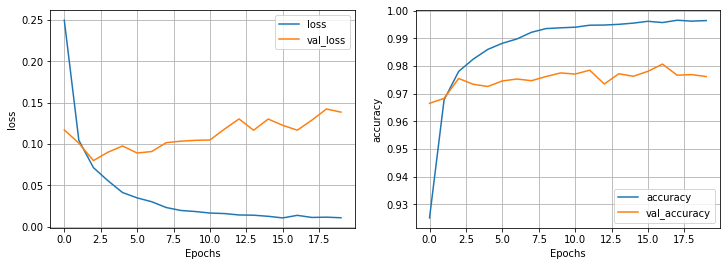

In [12]:
plot_metrics(metrics, style = "-")

In [13]:
model_3 = MLP_model(nodes=[128, 128, 10], activations=[
                    "relu", "relu", "softmax"], names=["Hidden1", "Hidden2", "Output"])
model_3.fit(X_train, y_train, epochs = 5, verbose = 1) # early stopping, and train on all training data

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2294 - accuracy: 0.9311
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0960 - accuracy: 0.9700
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0670 - accuracy: 0.9796
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0514 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0418 - accuracy: 0.9863


# Prediction and evaluation

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.95      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



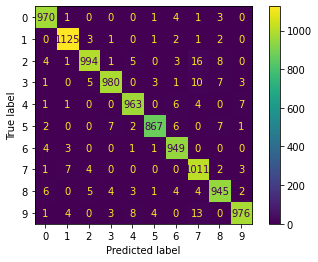

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Misclassification

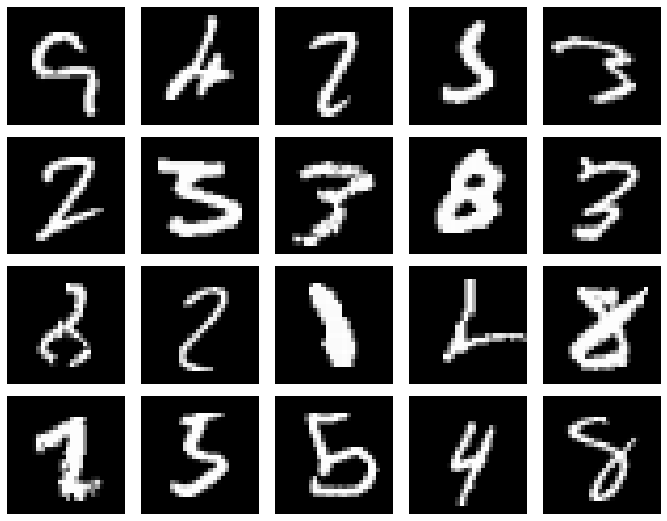

In [15]:
misclassified_indices = np.where(y_pred != y_test)
misclassified_samples = X_test[misclassified_indices]

display_images(misclassified_samples, 4,5, (12,8))